<a href="https://colab.research.google.com/github/serinamarie/DS-Unit-2-Applied-Modeling/blob/master/Speed_Dating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd
df = pd.read_csv('SpeedDatingData.csv')
#Link to dataset: http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/
df.rename(columns={'attr1_1': 'Import_of_Attr', 'sinc1_1':'Import_of_Sinc', 'intel1_1':'Import_of_Intell', 'fun1_1': 'Import_of_Fun', 'amb1_1':'Import_of_Amb', 'shar1_1':'Import_of_Shar','attr2_1':'Exp_of_Attr','sinc2_1':'Exp_of_Sinc','intel2_1':'Exp_of_Int', 'fun2_1':'Exp_of_Fun', 'fun2_1':'Exp_of_Fun','amb2_1':'Exp_of_Amb','shar2_1':'Exp_of_Shar'}, inplace=True)
!pip install category_encoders 
!pip install eli5

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import eli5
from eli5.sklearn import PermutationImportance
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np



pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [203]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,Import_of_Attr,Import_of_Sinc,Import_of_Intell,Import_of_Fun,Import_of_Amb,Import_of_Shar,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,Exp_of_Attr,Exp_of_Sinc,Exp_of_Int,Exp_of_Fun,Exp_of_Amb,Exp_of_Shar,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0

In [204]:
#We will split the data twice so we can validate it but also look at how well it 
#performs on 'wild data' in the end
target = 'gender'
X = df.drop(columns=target)
y = df[target]

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, 
    y, 
    train_size = 0.8,
    stratify=y, 
    random_state=8
)

X_trainval.shape, X_test.shape, y_trainval.shape, y_test.shape

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    train_size = 0.8,
    stratify=y_trainval,
    random_state=8
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5361, 194), (1341, 194), (5361,), (1341,))

##First Model:##
No feature engineering, all features included, no hyperparameter tuning

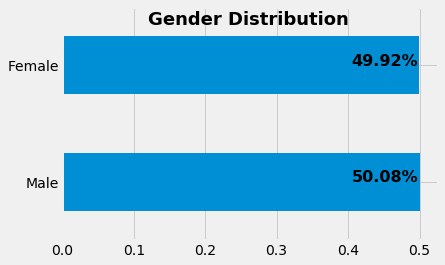

In [205]:
y_train_df = pd.DataFrame(data=y_train)

targ = y_train_df.replace({0:"Female", 1:'Male'})
targ = targ['gender'].value_counts(normalize=True)
plt.style.use('fivethirtyeight')
ax = targ.plot.barh()
ax.text(x=0.12,y=1.35, fontsize=18, fontweight='bold', s='Gender Distribution')
ax.text(x=.405, y=1, fontsize=16, fontweight='bold', s='49.92%')
ax.text(x=.405, y=0, fontsize=16, fontweight='bold', s='50.08%');

In [206]:
model = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=10, random_state=8)
)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('Validation Dataset Accuracy Score:', accuracy_score(y_pred, y_val))

Validation Dataset Accuracy Score: 0.9985085756897838


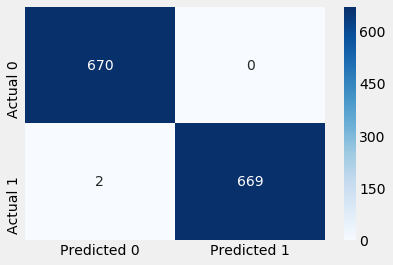

In [207]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='Blues')
    #Credit to Lambda School for this function

plot_confusion_matrix(y_val, y_pred);

##Exploration of the Data

In [0]:
# #Permutation
# transformers = make_pipeline(
#     ce.OrdinalEncoder(),
#     SimpleImputer(strategy='median')
# )

# X_train_transformed = transformers.fit_transform(X_train)
# X_val_transformed = transformers.fit_transform(X_val)

# rf = RandomForestClassifier(n_estimators=10, random_state=8, n_jobs=-1)
# rf.fit(X_train_transformed, y_train)

# permuter = PermutationImportance(
#     rf, 
#     scoring='accuracy',
#     n_iter=3,
#     random_state=8
# )

# permuter.fit(X_val_transformed, y_val)
# feature_names = X_val.columns.tolist()

# eli5.show_weights(
#     permuter,
#     top=None,
#     feature_names = feature_names
# )

With a single feature, the model performed at with a roc_auc score of 65%. Expectations of happiness were skewed. Women on average expected to be less happy during the event. Statistical testing led to a chi-squared statistic of 541~ and a p-value of 9.72e-111 

In [209]:
#Top permutation feature
observed = pd.crosstab(df['Exp_of_Attr'],df['gender']).values
chi_square, p_value, dof, expected = stats.chi2_contingency(observed)
print("Chi-Squared:", chi_square)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)

Chi-Squared: 2680.3221556852664
P-Value: 0.0
Degrees of Freedom: 86


In [210]:
#Top permutation feature
observed = pd.crosstab(df['Exp_of_Amb'],df['gender']).values
chi_square, p_value, dof, expected = stats.chi2_contingency(observed)
print("Chi-Squared:", chi_square)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)

Chi-Squared: 2201.0301766748416
P-Value: 0.0
Degrees of Freedom: 76


In [211]:
#Top 3 permutation feature
observed = pd.crosstab(df['Import_of_Attr'],df['gender']).values
chi_square, p_value, dof, expected = stats.chi2_contingency(observed)
print("Chi-Squared:", chi_square)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)

Chi-Squared: 3312.511893970124
P-Value: 0.0
Degrees of Freedom: 93


In [212]:
#Top permutation feature
df['binned_att'] = pd.cut(df['Import_of_Attr'], 10)
df.groupby('gender')['binned_att'].value_counts(normalize=True).sort_index()

gender  binned_att   
0       (-0.1, 10.0]     0.219879
        (10.0, 20.0]     0.605818
        (20.0, 30.0]     0.109091
        (30.0, 40.0]     0.030545
        (40.0, 50.0]     0.027152
        (50.0, 60.0]     0.005333
        (80.0, 90.0]     0.002182
1       (-0.1, 10.0]     0.041926
        (10.0, 20.0]     0.407044
        (20.0, 30.0]     0.339722
        (30.0, 40.0]     0.114039
        (40.0, 50.0]     0.051989
        (50.0, 60.0]     0.017489
        (60.0, 70.0]     0.009583
        (70.0, 80.0]     0.011500
        (90.0, 100.0]    0.006708
Name: binned_att, dtype: float64

In [0]:
df = df.drop(columns='binned_att')

##Next steps - cleaning
- Many leakage features: We don't want features we wouldn't have before the speed-dating event took place
- Drop the rows with differently formatted trait scales (waves 6-9)
- Many irrelevent features: we're testing perceptions in dating. The differences in gender seem to be stark enough that we don't need features like "undergrad", "income", etc.
- Many null-filled columns
- We will be left with no categorical features
- One or two features with low null counts can use imputation while wrangling data
-The remaining features are interdependent 


In [214]:
leakage_features = ['age_o', 'race_o','dec_o','attr_o', 'sinc_o', 
               'intel_o','fun_o','amb_o', 'shar_o','like_o','prob_o',
               'met_o','attr','sinc','intel','fun','amb','shar',
               'like','prob','met','attr1_s','sinc1_s','intel1_s',
               'fun1_s','amb1_s','shar1_s','satis_2','length','numdat_2',
               'attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2',
               'attr1_2','sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2',
               'attr4_2','sinc4_2', 'intel4_2','fun4_2','amb4_2','shar4_2',
               'attr2_2','sinc2_2','intel2_2','fun2_2','amb2_2','shar2_2',
               'attr3_2','sinc3_2','intel3_2','fun3_2','amb3_2','attr5_2',
               'sinc5_2','intel5_2','fun5_2','amb5_2','you_call','them_cal',
               'date_3','numdat_3','num_in_3','attr1_3','sinc1_3','intel1_3',
               'fun1_3','amb1_3','shar1_3','attr7_3','sinc7_3','intel7_3',
               'fun7_3','amb7_3','shar7_3','attr4_3','sinc4_3', 'intel4_3',
               'fun4_3','amb4_3','shar4_3','attr2_3','sinc2_3','intel2_3',
               'fun2_3','amb2_3','shar2_3','attr3_3','sinc3_3','intel3_3',
               'fun3_3','amb3_3','attr5_3','sinc5_3', 'intel5_3','fun5_3', 
               'partner', 'pid', 'match', 'amb5_3', 'wave', 'dec', 'attr3_s', 
               'sinc3_s','intel3_s', 'fun3_s', 'amb3_s' ]
X_train.drop(columns=leakage_features).shape

(5361, 81)

##Many nulls - dropped
- attr5_1
- sinc5_1
- intel5_1
- fun5_1
- amb5_1

##Low nulls - imputed
- field_cd

##Related to ID - dropped
- iid
- id
- idg
- condtn

##Irrelevent Features - dropped
###(Not a perception in dating)
- position
- positin1
- order
- field
- field_cd
- career
- career_c
- theater
- from
- zipcode
- income 
- sports
- tvsports
- exercise
- dining
- museums
- art
- hiking
- gaming
- clubbing
- reading
- tv
- movies
- concerts
- music
- shopping
- yoga
- round
- age
- int_corr
- undergra
- mn_sat
- tuition
- samerace
- race
- imprace
- imprelig
- date
- go_out
- goal

##Wrangling the data

In [0]:
def wrangle(X):

    #avoid copy warning
    X = X.copy()

    #drop the rows with differently formatted trait scales (waves 6-9)
    X = X[~X.wave.isin(range(6,10))]

    leakage_features = ['age_o', 'race_o','dec_o','attr_o', 'sinc_o', 
               'intel_o','fun_o','amb_o', 'shar_o','like_o','prob_o',
               'met_o','attr','sinc','intel','fun','amb','shar',
               'like','prob','met','attr1_s','sinc1_s','intel1_s',
               'fun1_s','amb1_s','shar1_s','satis_2','length','numdat_2',
               'attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2',
               'attr1_2','sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2',
               'attr4_2','sinc4_2', 'intel4_2','fun4_2','amb4_2','shar4_2',
               'attr2_2','sinc2_2','intel2_2','fun2_2','amb2_2','shar2_2',
               'attr3_2','sinc3_2','intel3_2','fun3_2','amb3_2','attr5_2',
               'sinc5_2','intel5_2','fun5_2','amb5_2','you_call','them_cal',
               'date_3','numdat_3','num_in_3','attr1_3','sinc1_3','intel1_3',
               'fun1_3','amb1_3','shar1_3','attr7_3','sinc7_3','intel7_3',
               'fun7_3','amb7_3','shar7_3','attr4_3','sinc4_3', 'intel4_3',
               'fun4_3','amb4_3','shar4_3','attr2_3','sinc2_3','intel2_3',
               'fun2_3','amb2_3','shar2_3','attr3_3','sinc3_3','intel3_3',
               'fun3_3','amb3_3','attr5_3','sinc5_3', 'intel5_3','fun5_3', 
               'partner', 'pid', 'match', 'amb5_3', 'wave', 'dec', 'attr3_s', 
               'sinc3_s','intel3_s', 'fun3_s', 'amb3_s' ]

    X = X.drop(columns=leakage_features)

    #fill nulls in field with best guess --> 'Operations Research' = Math (2)
    X['field_cd'] = X['field_cd'].fillna(2)

    #Gives away the id of the person
    id_info = ['iid', 'id', 'idg', 'condtn']
    X = X.drop(columns=id_info)

    #drop irrelevant columns (not to do with perceptions/expectations)
    dropped = ['position', 'positin1',	'order', 'field','field_cd', 'career', 
    'career_c', 'theater', 'from', 'zipcode', 'income', 'sports', 'tvsports',	
    'exercise','dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 
    'reading', 'tv', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'round', 
    'age', 'int_corr', 'undergra', 'mn_sat', 'tuition', 'samerace', 'race', 
    'imprace', 'imprelig','date', 'go_out', 'goal']
    
    X = X.drop(columns=dropped)

    #very high null counts
    fern_nully = ['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1','amb5_1']	
 
    X = X.drop(columns=fern_nully)

    return X

In [216]:
#Permutation with wrangled data
target = 'gender'
df1 = wrangle(df)
X = df1.drop(columns=target)
y = df1[target]

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, 
    y, 
    train_size = 0.8,
    stratify=y, 
    random_state=8
)

X_trainval.shape, X_test.shape, y_trainval.shape, y_test.shape

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    train_size = 0.8,
    stratify=y_trainval,
    random_state=8
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4361, 32), (1091, 32), (4361,), (1091,))

In [217]:
transformers = make_pipeline(
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.fit_transform(X_val)

rf = RandomForestClassifier(n_estimators=10, random_state=8, n_jobs=-1, oob_score=True)
rf.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    rf, 
    scoring='accuracy',
    n_iter=3,
    random_state=8
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None,
    feature_names = feature_names
)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Weight,Feature
0.0855 ± 0.0139,Exp_of_Attr
0.0559 ± 0.0045,Import_of_Amb
0.0513 ± 0.0105,Import_of_Attr
0.0266 ± 0.0090,Exp_of_Amb
0.0104 ± 0.0023,amb4_1
0.0086 ± 0.0038,pf_o_att
0.0079 ± 0.0053,Import_of_Shar
0.0067 ± 0.0009,exphappy
0.0067 ± 0.0031,Exp_of_Sinc
0.0055 ± 0.0030,Exp_of_Shar


In [218]:
rf.fit(X_train_transformed, y_train)
y_pred_rf = rf.predict(X_val_transformed)
print("Validation Set Accuracy Score:", accuracy_score(y_pred_rf, y_val))
print('OOB Score:', rf.oob_score_)

Validation Set Accuracy Score: 0.9935838680109991
OOB Score: 0.9775280898876404


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [219]:
feature_importances = pd.DataFrame(
    rf.feature_importances_, 
    index=X_train.columns,
    columns = ['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
Exp_of_Attr,0.114306
Import_of_Amb,0.106310
Import_of_Attr,0.098379
pf_o_att,0.079207
Exp_of_Amb,0.067137
Exp_of_Sinc,0.048919
amb4_1,0.043541
Exp_of_Int,0.040865
exphappy,0.039604
pf_o_amb,0.031439


##Feature conclusions:
- Model is 97% accurate with these 32 features
- Let's see how well it does with the 4 best features according to feature importances and permutation importances

In [220]:
women_exp = df2.loc[df2['gender'] == 0, 'Exp_of_Attr'].values
men_pref = df2.loc[df2['gender'] == 1, 'Import_of_Attr'].values
len(men_pref)

0

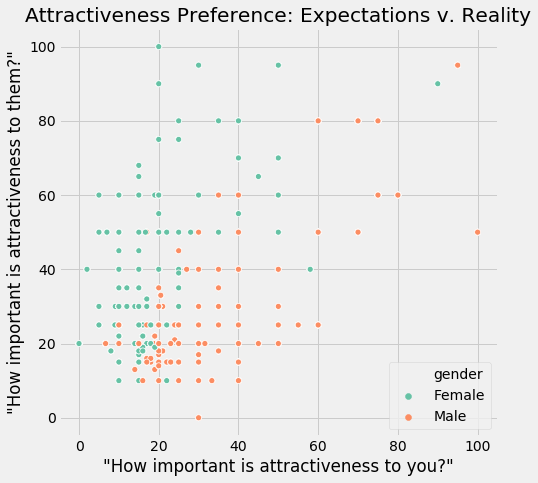

In [221]:
temp = (X_train.join(y_train.map({1:'Male',0:"Female"})))

plt.figure(figsize=(7,7))
sns.scatterplot(
    y='Exp_of_Attr',
    x='Import_of_Attr',
    hue='gender',
    data=temp,
    palette='Set2'
)

plt.ylabel('"How important is attractiveness to them?"')
plt.xlabel('"How important is attractiveness to you?"')
plt.title('Attractiveness Preference: Expectations v. Reality');

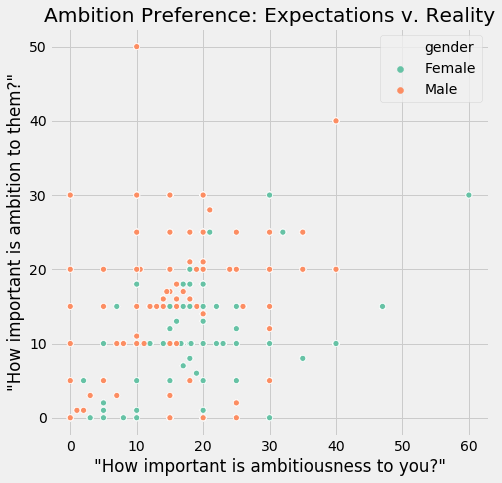

In [222]:

plt.figure(figsize=(7,7))
sns.scatterplot(
    y='Exp_of_Sinc',
    x='Import_of_Sinc',
    hue='gender',
    data=temp,
    palette='Set2'
)

plt.ylabel('"How important is ambition to them?"')
plt.xlabel('"How important is ambitiousness to you?"')
plt.title('Ambition Preference: Expectations v. Reality');

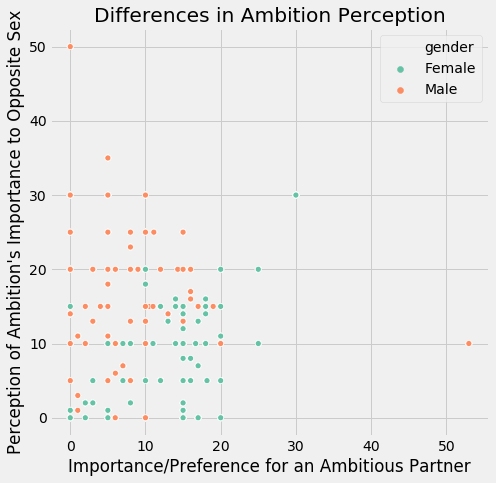

In [223]:
plt.figure(figsize=(7,7))
sns.scatterplot(
    y='Exp_of_Amb',
    x='Import_of_Amb',
    hue='gender',
    data=temp,
    palette='Set2'
)
plt.ylabel("Perception of Ambition's Importance to Opposite Sex")
plt.xlabel("Importance/Preference for an Ambitious Partner")
plt.title('Differences in Ambition Perception');

In [239]:
df2.gender = df2.gender.map({1:'Male',0:'Female'})
df2.head()

,gender,Import_of_Attr,Import_of_Sinc,Import_of_Intell,Import_of_Fun,Import_of_Amb,Import_of_Shar,Exp_of_Attr,Exp_of_Sinc,Exp_of_Int,Exp_of_Fun,Exp_of_Amb,Exp_of_Shar
0,Female,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
1,Female,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
2,Female,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
3,Female,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
4,Female,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0


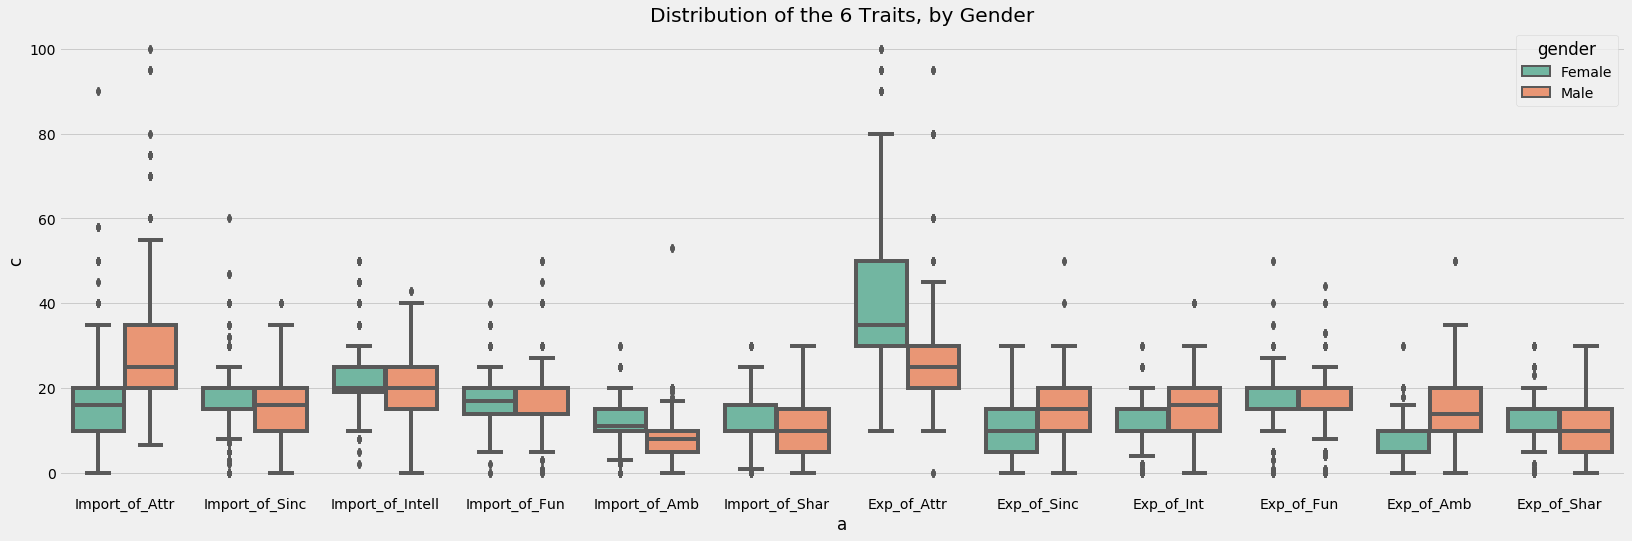

In [242]:
df_long = pd.melt(df2, 'gender', var_name='a', value_name='c')
plt.figure(figsize=(25,8))
sns.boxplot(x='a', hue='gender', y='c', data=df_long, palette='Set2')
plt.title('Distribution of the 6 Traits, by Gender');

- While men and women were pretty good guessers when it came to assessing the importance of shared interests, ambition and 'fun'
- Both genders placed more priority on intelligence, on average
- However both gender thought that intelligence was less important to the opposite sex
- In terms of sincerity, women slightly underestimated the importance of that to the men in the study
- Finally, attractiveness. The median of the importance of attractiveness was about 17. Men predicted that it would be about 25. So clearly men thought it was important to women that it was. Men rated importance (median) at 25, so they thought it was as important to women as it was to them. 
- On the other hand, the median of the data of women's expectations of its importance in men was at bout 35. So women thought it was even more important than it was. This might account for why it would seem that they thought men didn't care as much about things like sincerity.

- 100 points are divvied between 6 traits. Women on average rated attractiveness as about 20 points of importances but many rated it as less than 20.
- Women perceived that men rated attractiveness to be quite high in importance
-However they aren't wrong as most men placed a high importance on attractiveness but seemed to have a feeling that women did not place as high of importance on attractiveness

In [225]:
unnecessary = ['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha',
'exphappy','expnum',
'attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','attr3_1','sinc3_1','fun3_1','intel3_1','amb3_1', 'match_es']
df2 = wrangle(df.drop(columns=unnecessary))
X = df2.drop(columns=target)
y = df2[target]

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, 
    y, 
    train_size = 0.8,
    stratify=y, 
    random_state=8
)

X_trainval.shape, X_test.shape, y_trainval.shape, y_test.shape

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    train_size = 0.8,
    stratify=y_trainval,
    random_state=8
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4361, 12), (1091, 12), (4361,), (1091,))

In [226]:
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    RandomForestClassifier(
        n_jobs=-1, 
        random_state=8, 
        n_estimators=10, 
        oob_score=True)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_pred, y_val))
print("OOB Score:", pipeline.steps[1][1].oob_score_)

Validation Accuracy: 0.995417048579285
OOB Score: 0.99128640220133


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


- Model is basically just as good with only 4 features, versus 32 used previously
- In order to create an interactive app,
we should choose either the first set of 6 traits (attr1_1) or second set of 6 traits (attr2_1, etc)

In [227]:
unnecessary = ['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha',
'exphappy','expnum', 'attr4_1','sinc4_1','intel4_1','fun4_1',
'amb4_1','shar4_1','attr3_1','sinc3_1',
'fun3_1','intel3_1','amb3_1', 'match_es',]

df3 = wrangle(df.drop(columns=unnecessary))

X = df3.drop(columns=target)
y = df3[target]

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, 
    y, 
    train_size = 0.8,
    stratify=y, 
    random_state=8
)

X_trainval.shape, X_test.shape, y_trainval.shape, y_test.shape

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    train_size = 0.8,
    stratify=y_trainval,
    random_state=8
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4361, 12), (1091, 12), (4361,), (1091,))

In [228]:
df3.head()

,gender,Import_of_Attr,Import_of_Sinc,Import_of_Intell,Import_of_Fun,Import_of_Amb,Import_of_Shar,Exp_of_Attr,Exp_of_Sinc,Exp_of_Int,Exp_of_Fun,Exp_of_Amb,Exp_of_Shar
0,0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
1,0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
2,0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
3,0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
4,0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0


- Our features are completely dependent on each other


In [229]:
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    RandomForestClassifier(
        n_jobs=-1, 
        random_state=8, 
        n_estimators=100,
        max_depth=15,
        oob_score=True)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_pred, y_val))
print("OOB Score:", pipeline.steps[1][1].oob_score_)

Validation Accuracy: 0.995417048579285
OOB Score: 0.9970190323320339


In [0]:
# new_obs = [[15,20,20,15,20,10]]
# pipeline.predict(new_obs)

In [0]:
# joe = [[20,10,30,25,0,15]]
# pipeline.predict(joe)

In [0]:
#extract a single trededf
estimator = pipeline.steps[1][1].estimators_[5]

In [0]:
feature_names = ['Import_of_Attr', 'Import_of_Sinc', 'Import_of_Intell', 'Import_of_Fun', 'Import_of_Amb', 'Import_of_Shar']

In [0]:
# # Model (can also use single decision tree)
# from sklearn.ensemble import RandomForestClassifier
# pipeline3 = make_pipeline(
#     SimpleImputer(strategy='median'),
#     RandomForestClassifier(n_estimators=10)
# )
# # Train
# pipeline3.fit(X_train, y_train)
# # Extract single tree
# estimator = pipeline3.steps[1][1].estimators_[5]

# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = X_train.columns,
#                 class_names = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [0]:
def modelfit(alg, training_data, predictors, performCV=True, 
    printFeatureImportance=True, cv_folds=5):
    #Fit estimator on data
    alg.fit(training_data[predictors], training_data[target])

    #Predict with training set
    train_pred = alg.predict(training_data[predictors])
    train_predprob = alg.predict_proba(training_data[predictors])[:,1]

    #Perform cross_val
    if performCV:
        cv_score = cross_val_score(
            alg, training_data[predictors], training_data[target], 
            cv=cv_folds, scoring='accuracy')
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy: %.4g" % accuracy_score(training_data[target].values, train_pred))

    if performCV:
        print("CV Score: Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))

    #Print feature importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.steps[2][1].feature_importances_, alg.steps[0][1].get_feature_names()).sort_values(ascending=False)[:30]
        feat_imp.plot(kind='bar', title='Feature Importance')
        plt.ylabel('Feature Importance Score')

In [236]:
sns.scatterplot(x=df3_df['attr1_1'], y=df3_df['intel1_1'], hue=df3_df['gender'])

NameError: ignored

In [0]:
#Instantiate the classifier
from sklearn.neighbors import KNeighborsClassifier
mymodel = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [0]:
#fit on training dataset
mymodel.fit(X_train, y_train)

In [0]:
#predict on testing dataset
y_preds = mymodel.predict(X_test)

#evaluate accuracy
accuracy_score(y_test, y_preds)

In [0]:
#examine confusion matrix
confusion_matrix(y_test, y_preds)

In [0]:
#Create fake new data point to test model!! that's me
new_obs = [[15,20,20,15,20,10]]

In [0]:
#predict for our new observation. it knows me so well!
mymodel.predict(new_obs)

In [0]:
#what are indices of 5 neighbors nearest to that new observation?
mymodel.kneighbors(new_obs)

In [243]:
transformers = make_pipeline(
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.fit_transform(X_val)

rf = RandomForestClassifier(n_estimators=10, random_state=8, n_jobs=-1, oob_score=True)
rf.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    rf, 
    scoring='accuracy',
    n_iter=3,
    random_state=8
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None,
    feature_names = feature_names
)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Weight,Feature
0.1528 ± 0.0017,Import_of_Attr
0.1247 ± 0.0091,Exp_of_Attr
0.0608 ± 0.0156,Import_of_Amb
0.0577 ± 0.0144,Exp_of_Amb
0.0241 ± 0.0077,Exp_of_Sinc
0.0165 ± 0.0000,Exp_of_Int
0.0162 ± 0.0043,Import_of_Sinc
0.0082 ± 0.0000,Import_of_Intell
0.0052 ± 0.0023,Exp_of_Shar
0.0043 ± 0.0009,Import_of_Shar
